<a href="https://colab.research.google.com/github/Jayneet123/D2K11/blob/main/stock%20price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
!pip install yfinance
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime(2011,1,1)
start = datetime(2001,1,1)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

df.tail(10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2010-12-17,8.9205,8.9375,8.8510,8.8790,8.8790,90146000,AMAZON
2010-12-20,8.9635,9.1990,8.9020,9.1645,9.1645,174706000,AMAZON
2010-12-21,9.1940,9.2825,9.1300,9.2375,9.2375,102220000,AMAZON
2010-12-22,9.2500,9.2725,9.2055,9.2380,9.2380,51562000,AMAZON
2010-12-23,9.2170,9.2490,9.0945,9.1295,9.1295,67164000,AMAZON
2010-12-27,9.0950,9.1570,9.0225,9.1070,9.1070,44988000,AMAZON
2010-12-28,9.1050,9.1385,9.0525,9.0545,9.0545,39500000,AMAZON
2010-12-29,9.0900,9.2175,9.0205,9.1685,9.1685,62402000,AMAZON
2010-12-30,9.1960,9.2275,9.1375,9.1375,9.1375,39224000,AMAZON


In [46]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,3.010006,3.050612,2.962953,3.008556,2.560638,6.322304e+08
std,2.956665,2.986103,2.918662,2.954430,2.514570,4.267636e+08
min,0.231964,0.235536,0.227143,0.234286,0.199405,3.934000e+07
25%,0.408661,0.416071,0.400804,0.408839,0.347971,3.235722e+08
50%,2.173214,2.202500,2.130000,2.170000,1.846927,5.194476e+08
75%,4.878928,4.944821,4.795892,4.867857,4.143122,8.210272e+08
max,11.650714,11.666429,11.610714,11.623929,9.893337,3.372970e+09


In [45]:
df.to_csv("/content/h.csv")

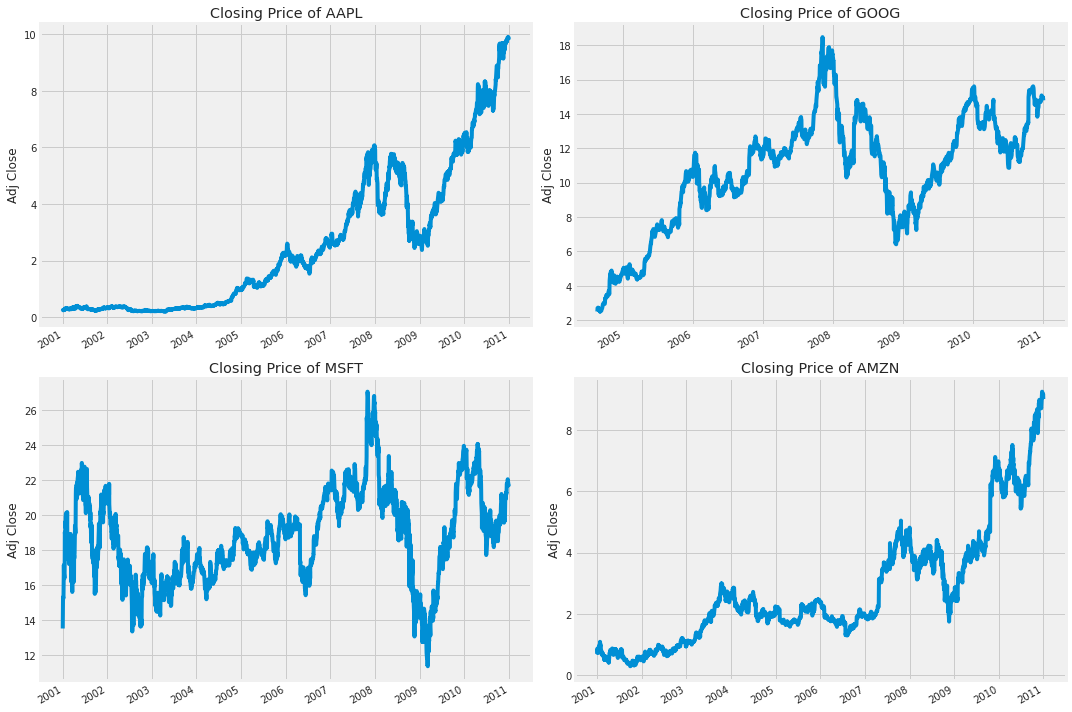

In [11]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

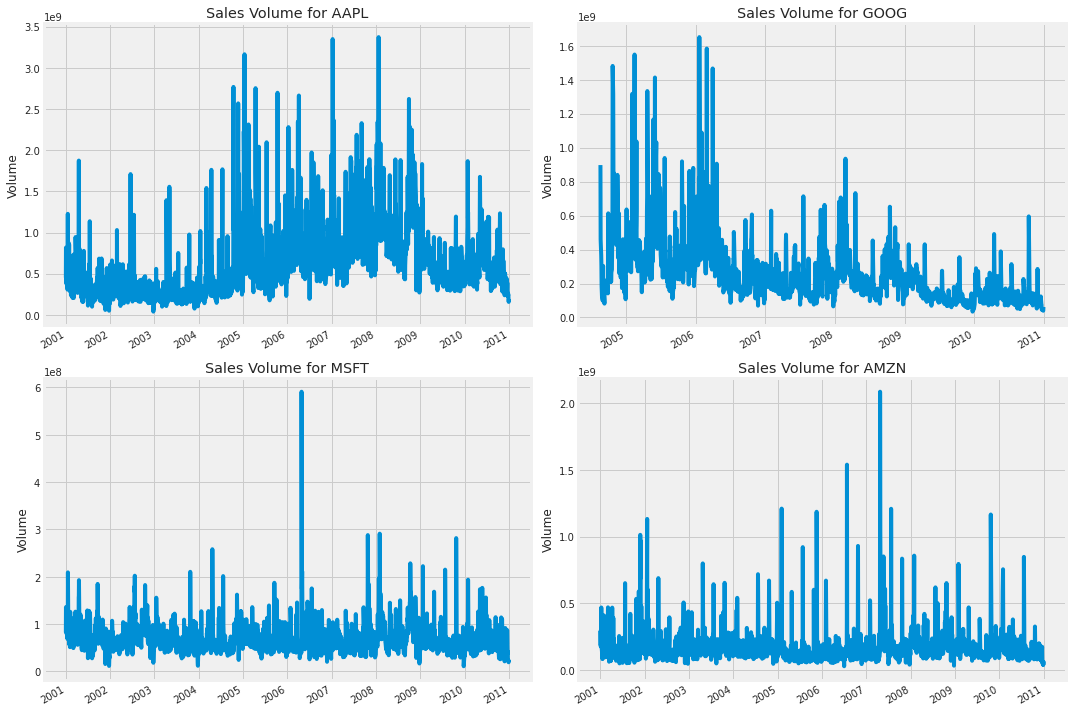

In [12]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()


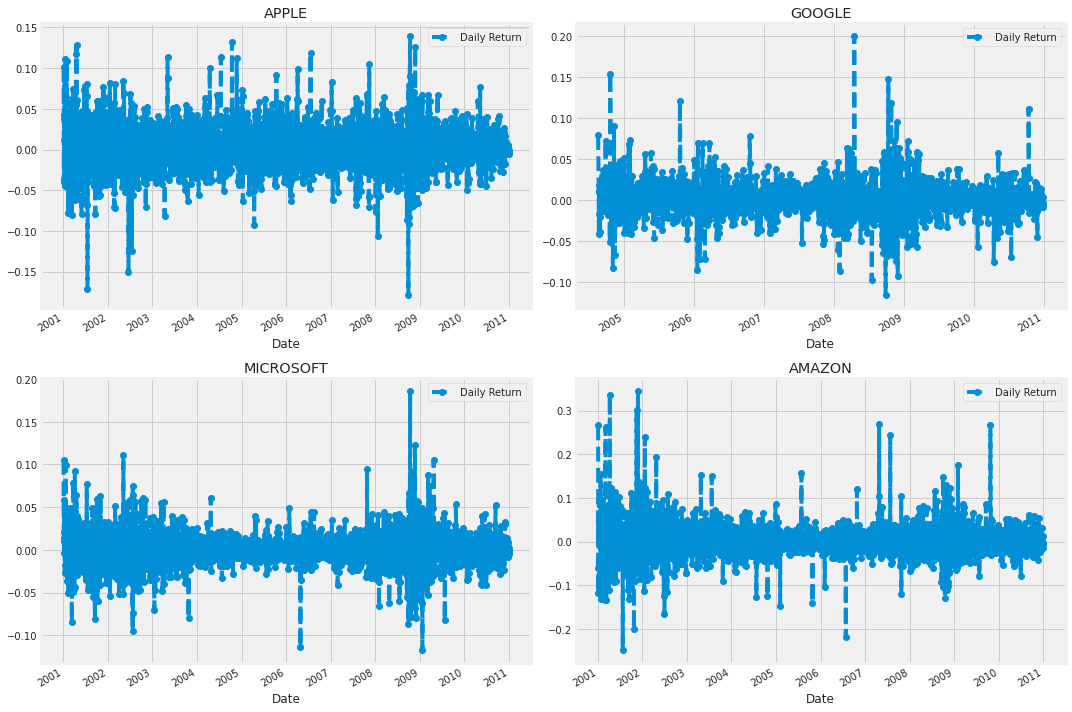

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

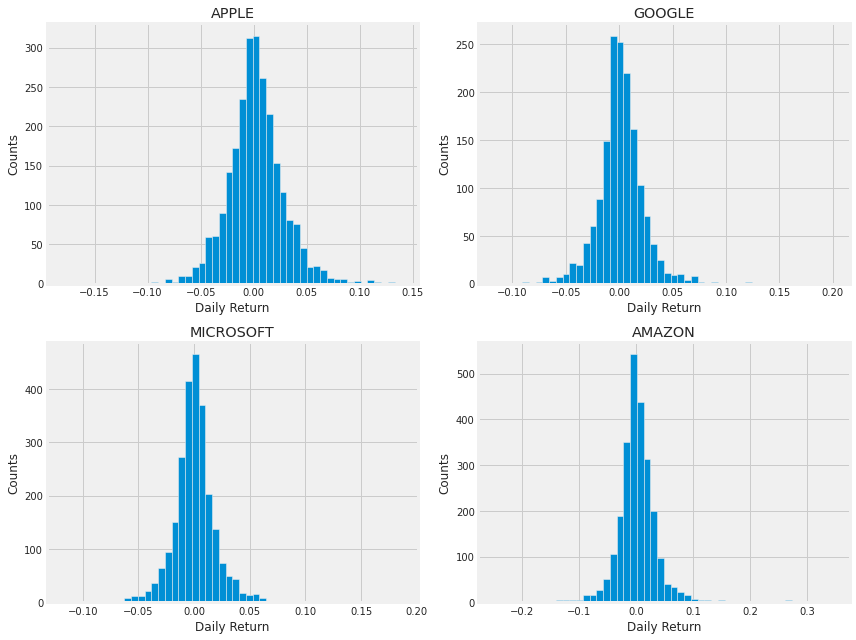

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2001-01-02,NaN,NaN,NaN,NaN
2001-01-03,0.100841,0.265766,NaN,0.105187
2001-01-04,0.041985,-0.117438,NaN,0.010431
2001-01-05,-0.040294,-0.060484,NaN,0.014193
2001-01-08,0.011450,0.025751,NaN,-0.003817


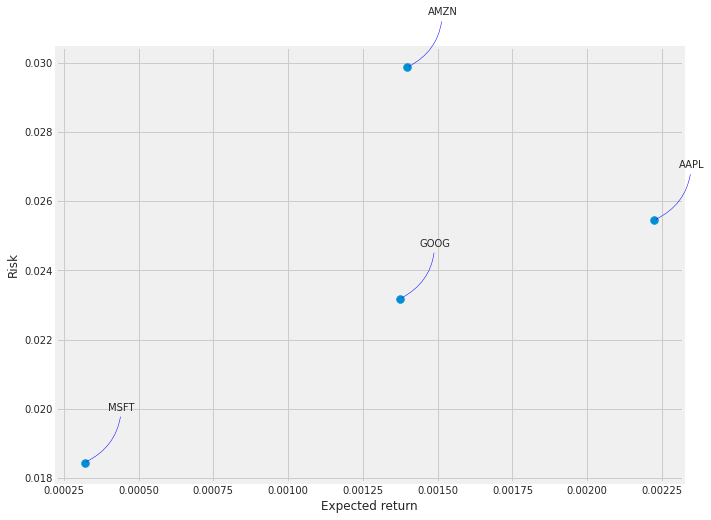

In [51]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [47]:
max_value = []
def get_price(company):
  df = pdr.get_data_yahoo(company, start='2001-01-01', end='2021-01-01')
  # Create a new dataframe with only the 'Close column 
  data = df.filter(['Close'])
  # Convert the dataframe to a numpy array
  dataset = data.values
  # Get the number of rows to train the model on
  training_data_len = int(np.ceil( len(dataset) * .95 ))

  #Scale the data
  from sklearn.preprocessing import MinMaxScaler

  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
  x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
  
  from keras.models import Sequential
  from keras.layers import Dense, LSTM

# Build the LSTM model
  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

# Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae"])

# Train the model
  model.fit(x_train, y_train, batch_size=1, epochs=1)
  test_data = scaled_data[training_data_len - 60: , :]
  # model.save("saved_model.h5")
  model.save("h1.csv")
# Create the data sets x_test and y_test
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
  x_test = np.array(x_test)

# Reshape the data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
  predictions = model.predict(x_test)
  max_value.append(max(predictions))
  predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
  
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  # Visualize the data
  plt.figure(figsize=(16,6))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
  plt.show()




[*********************100%***********************]  1 of 1 completed
[array([0.00022966, 0.00042596, 0.00051593, 0.00042596, 0.0004505 ,
       0.00053229, 0.0004505 , 0.00063862, 0.00053229, 0.00052411,
       0.00048321, 0.00072858, 0.00083491, 0.00080219, 0.00096577,
       0.00096577, 0.00089216, 0.00084309, 0.00112118, 0.00112936,
       0.001113  , 0.00104756, 0.00098214, 0.00092488, 0.00104756,
       0.00099849, 0.00099849, 0.00078584, 0.00085945, 0.00078584,
       0.00083491, 0.00090852, 0.00076948, 0.00067951, 0.00075312,
       0.00074495, 0.00074495, 0.00083491, 0.00081855, 0.00067133,
       0.00073676, 0.00080219, 0.00094941, 0.00109664, 0.00106392,
       0.00100667, 0.00093306, 0.0007204 , 0.00084309, 0.00095759,
       0.00085945, 0.00085127, 0.00097396, 0.00085945, 0.0009167 ,
       0.001113  , 0.00129293, 0.00113328, 0.00127592, 0.00118432])]
[0.001231425255315516]

[array([0.00022966, 0.00042596, 0.00051593, 0.00042596, 0.0004505 ,
       0.00053229, 0.0004505 , 0

8/8 [==============================] - 1s 40ms/step


<ipython-input-47-786d20f53b6f>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


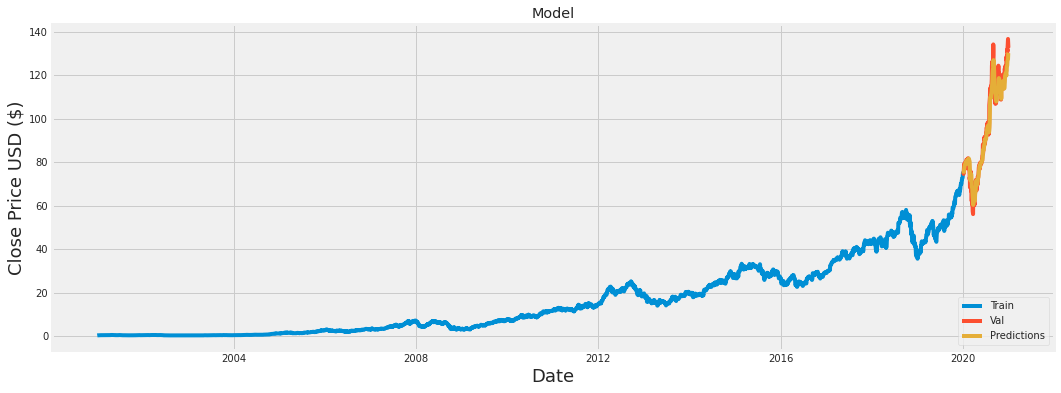

[*********************100%***********************]  1 of 1 completed
[array([9.24567157e-05, 2.32515312e-03, 2.63050056e-03, 1.36147730e-03,
       1.67802852e-03, 2.21309380e-03, 1.72004942e-03, 5.60283192e-04,
       6.61130680e-04, 6.72388099e-05, 4.20209042e-04, 0.00000000e+00,
       4.39822373e-04, 6.41525394e-04, 6.44325000e-04, 1.49033961e-03,
       2.09823488e-03, 3.21599093e-03, 3.35885664e-03, 3.91072492e-03,
       4.89681637e-03, 5.42066982e-03, 4.99486157e-03, 5.14612878e-03,
       5.82967508e-03, 5.55233443e-03, 5.11252278e-03, 7.52170431e-03,
       8.70388615e-03, 8.28927901e-03, 9.12409251e-03, 9.81882651e-03,
       1.07460833e-02, 1.03847116e-02, 1.08805475e-02, 1.05667986e-02,
       9.87486153e-03, 1.04743553e-02, 1.14548341e-02, 1.17629812e-02,
       1.23540734e-02, 1.37687727e-02, 1.34270063e-02, 1.13399752e-02,
       1.38303989e-02, 2.02875799e-02, 2.44812340e-02, 2.29124679e-02,
       2.40806436e-02, 2.61340473e-02, 2.53888855e-02, 2.68988224e-02,
       

7/7 [==============================] - 2s 39ms/step


<ipython-input-47-786d20f53b6f>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


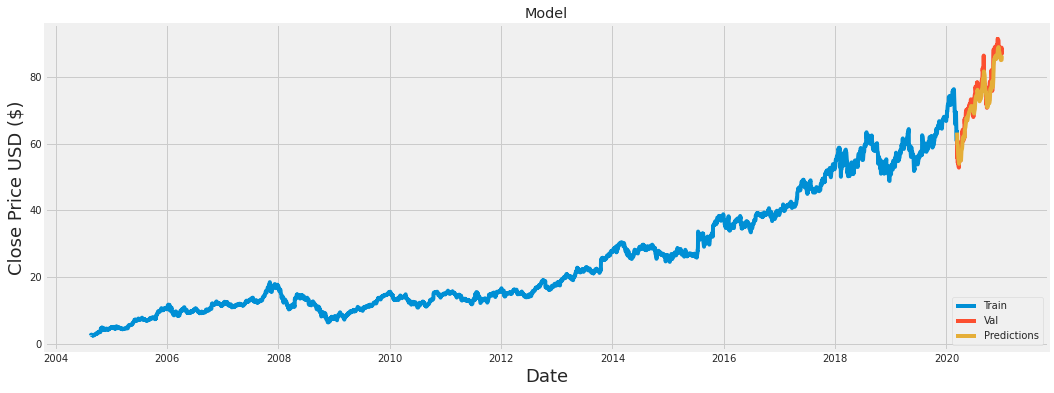

[*********************100%***********************]  1 of 1 completed
[array([0.03019631, 0.04073326, 0.04188799, 0.04347575, 0.04304273,
       0.04968245, 0.05213626, 0.05704388, 0.05357968, 0.05141455,
       0.0522806 , 0.05819862, 0.0709007 , 0.06887991, 0.0698903 ,
       0.07537529, 0.07277714, 0.0778291 , 0.07898384, 0.07638569,
       0.07104504, 0.07407622, 0.07046767, 0.07306582, 0.07450924,
       0.07941686, 0.07378753, 0.06657044, 0.06570439, 0.06440532,
       0.06483834, 0.06584873, 0.06238453, 0.05906467, 0.05993072,
       0.05747691, 0.06108545, 0.06758083, 0.06714781, 0.06628176,
       0.06711172, 0.06094111, 0.06267321, 0.06729215, 0.07017899,
       0.06685913, 0.06094111, 0.04997113, 0.05516744, 0.05473441,
       0.05401271, 0.05603349, 0.05545612, 0.05170324, 0.04564088,
       0.05473441, 0.06065243, 0.05949769, 0.06454966, 0.05834296])]
[0.05790993400846664]

[array([0.03019631, 0.04073326, 0.04188799, 0.04347575, 0.04304273,
       0.04968245, 0.05213626, 0.

8/8 [==============================] - 1s 43ms/step


<ipython-input-47-786d20f53b6f>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


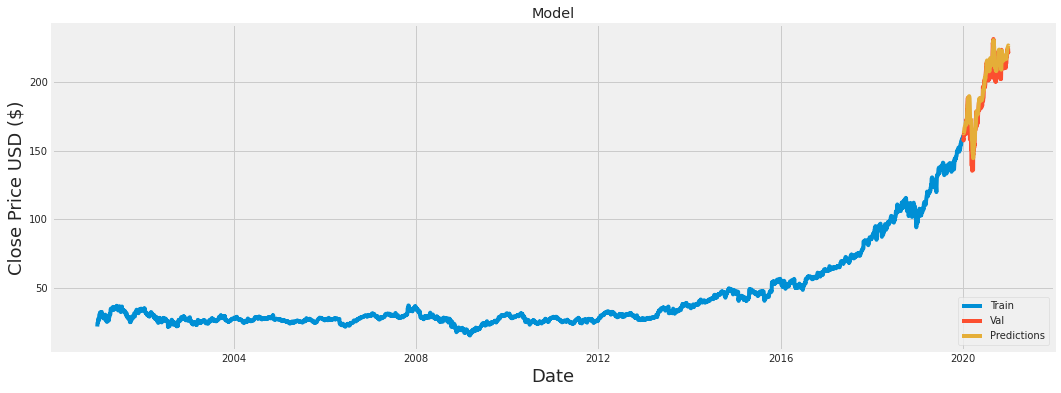

[*********************100%***********************]  1 of 1 completed
[array([0.00224225, 0.0032882 , 0.00270318, 0.00243726, 0.00254363,
       0.00295137, 0.00298683, 0.00312865, 0.00332366, 0.00343003,
       0.00351867, 0.00383778, 0.00396187, 0.00355413, 0.00368265,
       0.00451144, 0.00369595, 0.00383778, 0.00401506, 0.00367822,
       0.00321729, 0.00291592, 0.00238407, 0.0024018 , 0.00279182,
       0.00256135, 0.00238407, 0.00210042, 0.00241953, 0.00220679,
       0.0024018 , 0.00241953, 0.00218906, 0.00185223, 0.00169268,
       0.00169268, 0.00165722, 0.00169268, 0.00163949, 0.00119629,
       0.0012672 , 0.00114311, 0.00188769, 0.00167495, 0.00178132,
       0.00162177, 0.00178132, 0.00132039, 0.00142676, 0.00132039,
       0.0013913 , 0.00142676, 0.00128493, 0.00121402, 0.00114311,
       0.00119629, 0.00119629, 0.00140974, 0.00160829, 0.00137003])]
[0.0011431067817738116]

[array([0.00224225, 0.0032882 , 0.00270318, 0.00243726, 0.00254363,
       0.00295137, 0.00298683, 

8/8 [==============================] - 1s 43ms/step


<ipython-input-47-786d20f53b6f>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


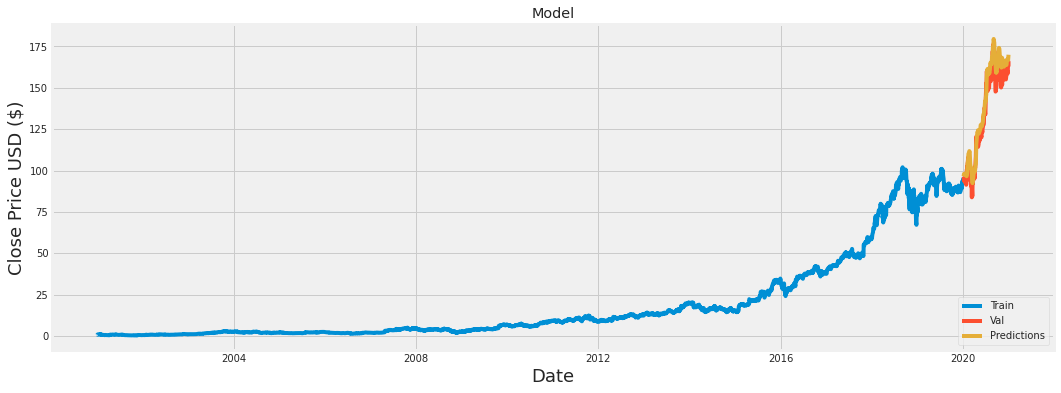

In [50]:
get_price('AAPL')
get_price('GOOG')
get_price('MSFT')
get_price('AMZN')

In [30]:
max_value

[array([0.95170945], dtype=float32)]

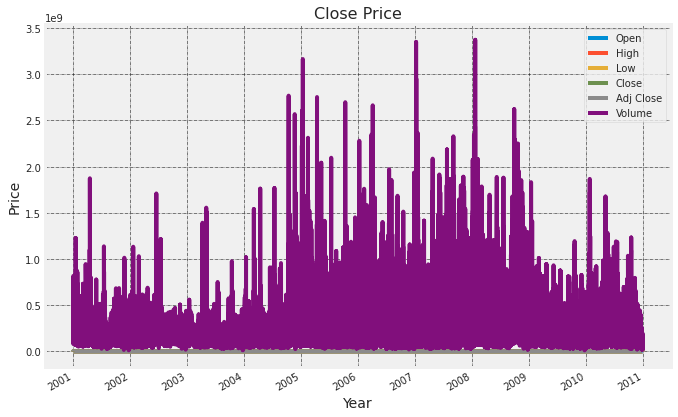

In [49]:
# Plot all the close prices
df.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

NameError: ignored